# Objetivo da competição
 
Na competição será utilizado um conjunto de dados relacionado com o resultado de campanhas de marketing de uma instituição financeira. O objetivo da modelagem é prever se um cliente fará um depósito.
 



# Descrição do algoritmo
 
Este algoritmo tem como objetivo realizar análise exploratória no dataset da segunda competição da flai. E realizar um estudo de qual melhor maneira de codificar as variáveis categóricas.  

# Descrição das colunas do dataset


- **age:** Idade do cliente.
- **job:** tipo de emprego.
- **marital:** estado civil.
- **education:** nível de educação.
- **default:** é inadimplente?
- **balnce:** quantidade em conta.
- **loan:** Tem empréstimo pessoal?
- **contact:** tipo de comunicação.
- **moth:** mês do último contato.
- **compaingn:** número de contatos realizados com o cliente.
- **pdays:** número de dias que se passaram depois que o cliente foi constatado pela última vez em uma campanha anterior.
- **previous:** número de contatos realizados antes desta campanha.
- **poutcome:** resultado da campanha de marketing anterior.
- **term_deposit:** o cliente fez um depósito? **[variável resposta]**
 


# Avaliação
 
 
 
 
 
> A métrica alvo é do modelo com o melhor F1-Score. No caso essa medida se trata de uma média harmônica entre a medida de Precision e Recall, conforme está sendo mostrada na equação abaixo.
 
 
> F1-Score = $2\frac{Precision*Recall}{Precison + Recall}$
 
 
 
 
 
 
 
 
---
 
 
> Precision ou precisão: também conhecida como Valor Preditivo Positivo,é a métrica que traz a informação da quantidade de observações classificadas como positiva (1) que realmente são positiva. Ou seja, entre todas as observações identificadas como positivas (1), quantas foram identificadas corretamente.
 
 
 
---
 
> Recall ou Sensibilidade: entre todas as observações que realmente são positivas no seu conjunto de dados.  Ou seja, entre todas as observações que são positivas quantas o modelo conseguiu identificar como positiva. Representa a capacidade de um modelo em prever a classe positiva.

##Refêrencia: 
https://www.flai.com.br/juscudilio/qual-a-melhor-metrica-para-avaliar-os-modelos-de-machine-learning/
 
 
 
 
 
 
 
 
 
 
 
 
 
 



# Biblioteca

In [ ]:
# import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Datasets de  treinanamento e teste



In [ ]:
df_trein = pd.read_csv('/content/drive/My Drive/Competição FLAI/treino.csv') # dados usados para treinamento
df_teste = pd.read_csv('/content/drive/My Drive/Competição FLAI/teste.csv')  # dados usado  para teste

Análise exploratória dos dados

In [ ]:
print('nome das colulas: \n',df_trein.columns.values,'tamanho do dataflame:', df_trein.shape)
print('\n')
print('nome das colulas: \n',df_teste.columns.values,'tamanho do dataflame:', df_teste.shape)

nome das colulas: 
 ['Unnamed: 0' 'age' 'job' 'marital' 'education' 'default' 'balance'
 'housing' 'loan' 'contact' 'day' 'month' 'campaign' 'pdays' 'previous'
 'poutcome' 'term_deposit'] tamanho do dataflame: (6500, 17)


nome das colulas: 
 ['Unnamed: 0' 'age' 'job' 'marital' 'education' 'default' 'balance'
 'housing' 'loan' 'contact' 'day' 'month' 'campaign' 'pdays' 'previous'
 'poutcome'] tamanho do dataflame: (1422, 16)


In [ ]:
print('dados faltantes nos dados de treiamento: \n',np.sum(df_trein.isnull(),axis = 0))

print('\n')
print('dados faltantes no teste: \n', np.sum(df_teste.isnull(),axis = 0))

dados faltantes nos dados de treiamento: 
 Unnamed: 0      0
age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
campaign        0
pdays           0
previous        0
poutcome        0
term_deposit    0
dtype: int64


dados faltantes no teste: 
 Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
dtype: int64


In [ ]:
print('tipo das variáveis:\n',df_trein.dtypes)

tipo das variáveis:
 Unnamed: 0       int64
age              int64
job             object
marital         object
education       object
default         object
balance          int64
housing         object
loan            object
contact         object
day              int64
month           object
campaign         int64
pdays            int64
previous         int64
poutcome        object
term_deposit    object
dtype: object


### Distribuições das variáveis

In [ ]:
colunas_intera =df_trein.columns[df_trein.dtypes == 'int64']  # Variáveis númericas
colunas_object =df_trein.columns[df_trein.dtypes == 'object'] # Variáveis objetos

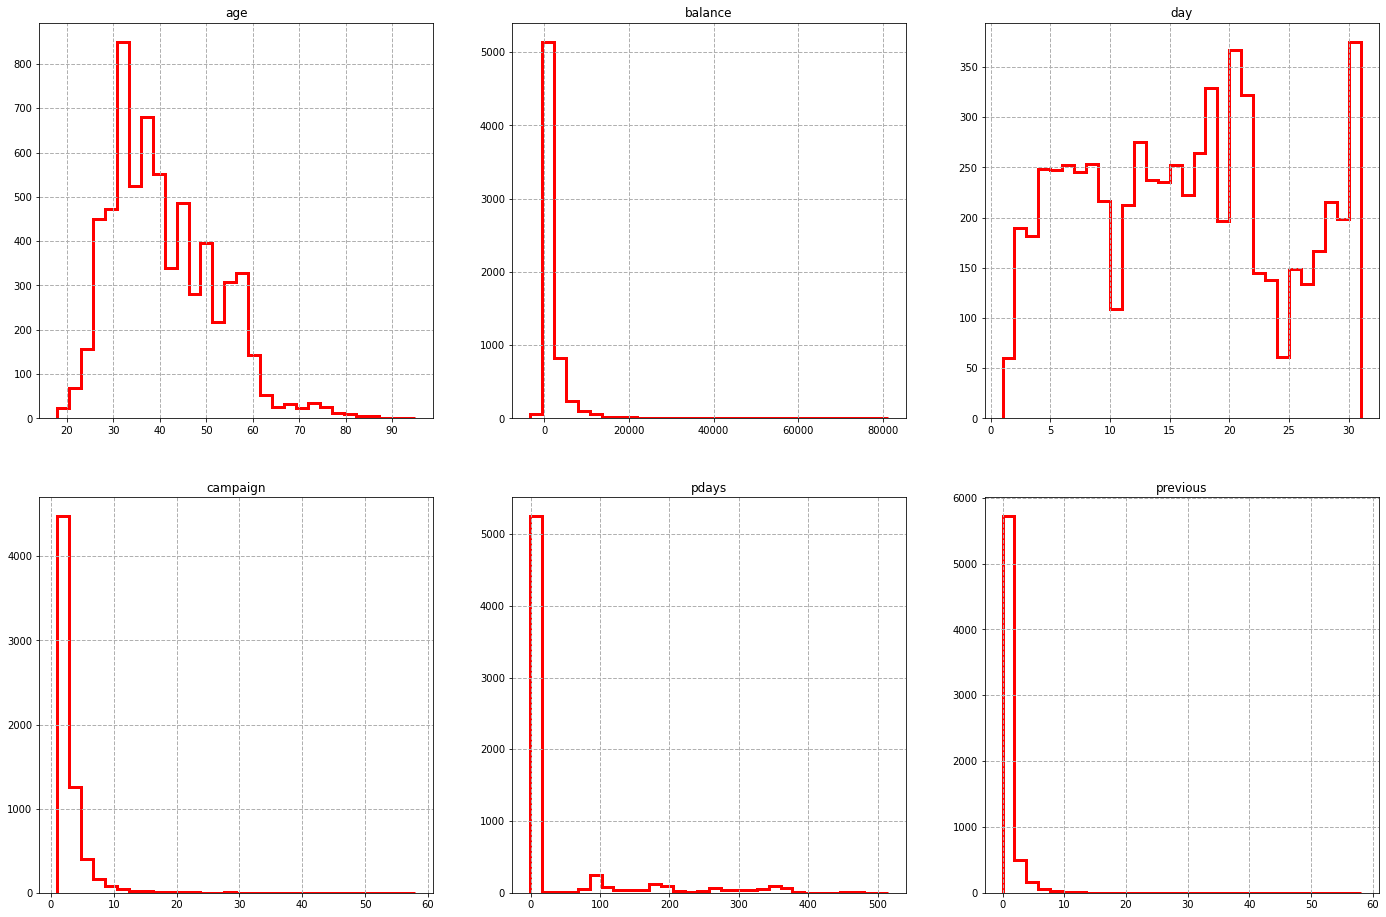

In [ ]:
plt.figure(figsize=(24,16))
for i in range(1,7):
  plt.subplot(2,3,i)
  plt.title(colunas_intera[i])
  plt.hist(df_trein[colunas_intera[i]], bins = 30, histtype='step', color = 'red',linewidth = 3)
  plt.grid(linestyle='--', linewidth=1)

plt.show()

As váriaveis pdays e previous podem ser discretizadas, irei realizar este teste depois

### Contagem das classes de cada variável objeto

In [ ]:
for i in range(len(colunas_object)):
  #print(colunas_object[i])
  print(df_trein[colunas_object[i]].value_counts())
  print('\n')

management       1473
blue-collar      1240
technician       1045
admin.            748
services          579
retired           397
self-employed     240
unemployed        219
entrepreneur      188
student           171
housemaid         162
unknown            38
Name: job, dtype: int64


married     3686
single      2035
divorced     779
Name: marital, dtype: int64


secondary    3220
tertiary     2117
primary       893
unknown       270
Name: education, dtype: int64


no     6403
yes      97
Name: default, dtype: int64


yes    3253
no     3247
Name: housing, dtype: int64


no     5621
yes     879
Name: loan, dtype: int64


cellular     4634
unknown      1445
telephone     421
Name: contact, dtype: int64


may    1720
aug     918
jul     889
jun     746
nov     604
apr     578
feb     381
oct     211
jan     137
sep     113
mar     113
dec      90
Name: month, dtype: int64


unknown    5233
failure     650
success     369
other       248
Name: poutcome, dtype: int64


no     3267
yes

A variável de Target está equilibrada, sobre as demais a loan e default podem ser candidatas a serem descartadas na hora da modelagem dos modelos de machine learning.


### Olhando a relação dos dados em relação aos dados de target








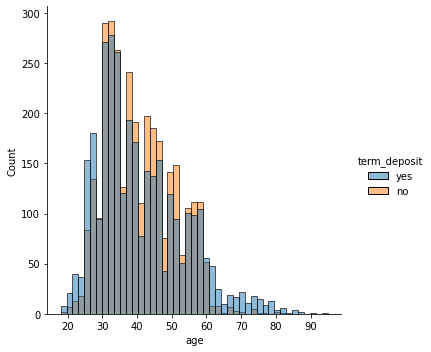

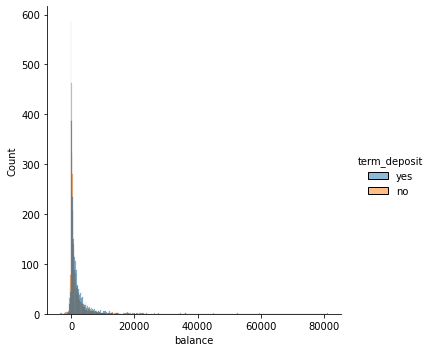

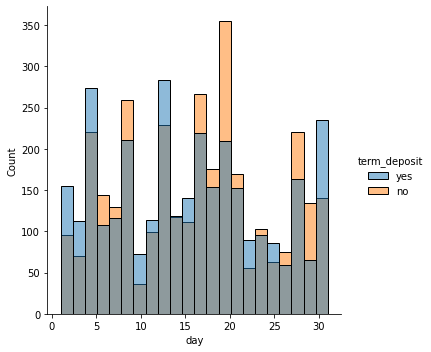

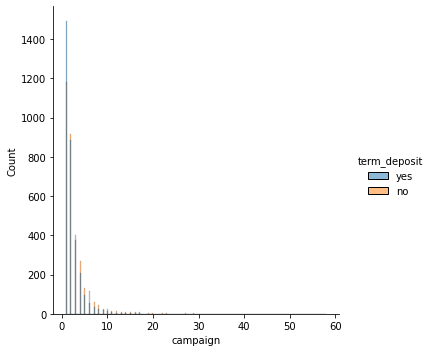

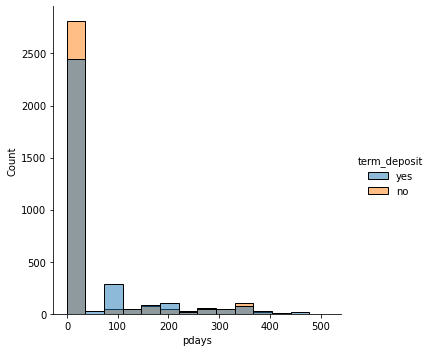

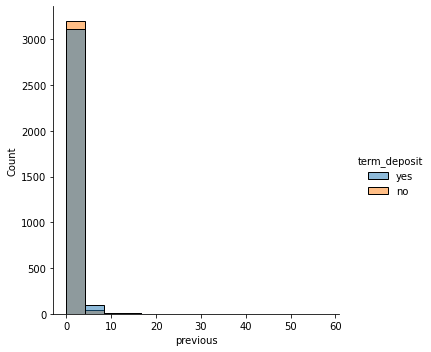

In [ ]:
for i in range(1,7):
  sns.displot(df_trein, x=colunas_intera[i], hue='term_deposit')
  plt.show()

Uma informação que vale destacar é que a maioria das pessoas acima de 60 anos tem uma alta chance de realizar o deposito

In [ ]:
for i in range(len(colunas_object)):
  print(colunas_object[i])
  print(df_trein.groupby(['term_deposit'])[colunas_object[i]].value_counts())
  print('\n')

job
term_deposit  job          
no            blue-collar      743
              management       685
              technician       512
              admin.           374
              services         330
              retired          131
              self-employed    120
              unemployed       114
              entrepreneur      99
              housemaid         98
              student           45
              unknown           16
yes           management       788
              technician       533
              blue-collar      497
              admin.           374
              retired          266
              services         249
              student          126
              self-employed    120
              unemployed       105
              entrepreneur      89
              housemaid         64
              unknown           22
Name: job, dtype: int64


marital
term_deposit  marital 
no            married     2014
              single       896
         

A princípio não irei concluir nada sobre a relação dos dados com do target
 
 
 



# Estudo de qual melhor maneira de codificar as variáveis categóricas.  

### Primeiro teste: Aplicação só do LabelEncoder.







> A estratégia adotada será através da avaliação da performance de 4 banco de dados criados a partir dos dados de teste no classificador floresta aleatória. A descrição de cada dataflame está sendo mostrado a seguir:
* Aux: Todas as variáveis.
* aux1: Cortanto as colunas 'default','loan','job'.
* aux2: Corta as colunas 'default','loan','job','poutcome'.
* aux3: Apenas as variááveis númericas.
 



In [ ]:

df_trein.drop(columns=['Unnamed: 0'],inplace =True)

In [ ]:

df_trein['term_deposit'] = df_trein['term_deposit'].map({'no': 0, 'yes': 1})

In [ ]:
df_trein.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,term_deposit
0,46,management,divorced,tertiary,no,14481,yes,no,unknown,30,may,1,-1,0,unknown,1
1,37,management,single,tertiary,no,457,yes,no,cellular,1,apr,3,-1,0,unknown,0
2,34,blue-collar,single,secondary,no,1698,yes,no,unknown,27,may,7,-1,0,unknown,0
3,45,unemployed,single,secondary,no,33,no,no,cellular,5,feb,1,-1,0,unknown,0
4,31,management,married,tertiary,no,131,no,no,cellular,18,feb,2,-1,0,unknown,1


In [ ]:
df_aux  = df_trein.copy()
df_aux1 = df_trein.copy()
df_aux2 = df_trein.copy()
df_aux3 = df_trein.copy()

In [ ]:
df_aux1.drop(columns=['default','loan','job'],inplace =True)
df_aux2.drop(columns=['default','loan','job','poutcome'],inplace =True)
df_aux3.drop(columns=colunas_object,inplace =True)


In [ ]:
df_aux3['term_deposit'] =df_aux1['term_deposit']

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_aux1_V1 = df_aux1.copy()
df_aux1_V2 = df_aux1.copy()

In [ ]:
def encoder_var(df):
  ind = df.columns[df.dtypes == 'object']

  for i in range(len(ind)):
    enc = LabelEncoder()
    inteiros = enc.fit_transform(df[ind[i]])
    df[ind[i]] = inteiros

  return df

In [ ]:
#ind = df_aux1_V1.columns[df_aux1_V1.dtypes == 'object']

#for i in range(len(ind)):
#  enc = LabelEncoder()
#  inteiros = enc.fit_transform(df_aux1_V1[ind[i]])
#  df_aux1_V1[ind[i]] = inteiros

df_aux = encoder_var(df_aux)
df_aux1_V1 = encoder_var(df_aux1_V1)
df_aux2 = encoder_var(df_aux2)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier #use RandomForestRegressor para problemas de regressão
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from xgboost.sklearn import XGBClassifier

In [ ]:
def resultados(X_train,y_train,linhas_treino,linhas_valid,c):

    #print('a')
    X_t, X_v = X_train[linhas_treino], X_train[linhas_valid]
    y_t, y_v = y_train[linhas_treino], y_train[linhas_valid]
    #print('b')
    #y_t = y_t.values.reshape(1,-1)
    #y_v = y_v.values.reshape(1,-1)
    model = RandomForestClassifier(n_estimators=1000, n_jobs=6, random_state=10)

    #X_v.shape()
    # resultados floresta aleatoria
    model.fit(X_t, y_t)

    prf = model.predict_proba(X_v)[:,1]
    prf_ = (prf > c).astype(int)

    acerto_v = f1_score(y_v, prf_)


    #print('c')
    #y_pred = model.predict(X_v)
    #acerto_v  = f1_score(y_v,y_pred)

    return acerto_v

In [ ]:
kf = KFold(n_splits=10, random_state=5, shuffle=True)

In [ ]:
X_train  = df_aux.drop(columns='term_deposit')
X_train1 = df_aux1_V1.drop(columns='term_deposit')
X_train2 = df_aux2.drop(columns='term_deposit')
X_train3 = df_aux3.drop(columns='term_deposit')

y_train1 = df_aux1_V1['term_deposit']


In [ ]:

j = 0 
#i = 30
for k in np.arange(0.1,1,0.1):
  j =0

  acerto_v     = np.zeros(10)
  acerto_v1    = np.zeros(10)
  acerto_v2    = np.zeros(10)
  acerto_v3    = np.zeros(10)
  for linhas_treino, linhas_valid in kf.split(X_train1):
    acerto_v[j] =  resultados(X_train.values,y_train1.values,linhas_treino,linhas_valid,k)
    acerto_v1[j] =  resultados(X_train1.values,y_train1.values,linhas_treino,linhas_valid,k)
    acerto_v2[j] =  resultados(X_train2.values,y_train1.values,linhas_treino,linhas_valid,k)
    acerto_v3[j] =  resultados(X_train3.values,y_train1.values,linhas_treino,linhas_valid,k)
  
    j = j = j+1

  print('limiar', str(k))
  print('dataset aux  f1-score:     ',np.format_float_positional(np.mean(acerto_v),5),' erro:',np.format_float_positional(np.std(acerto_v)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v),5))
  print('dataset aux1 f1-score:     ',np.format_float_positional(np.mean(acerto_v1),5),' erro:',np.format_float_positional(np.std(acerto_v1)/np.sqrt(10),5),' desivo padrão:',np.format_float_positional(np.std(acerto_v1),5))
  print('dataset axu2 f1-score:     ',np.format_float_positional(np.mean(acerto_v2),5),' erro:',np.format_float_positional(np.std(acerto_v2)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v2),5))
  print('dataset aux3 f1-score:     ',np.format_float_positional(np.mean(acerto_v3),5),' erro:',np.format_float_positional(np.std(acerto_v3)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v3),5))

  print('\n')

limiar 0.1
dataset aux  f1-score:      0.66469  erro: 0.00394  desvio padrão: 0.01245
dataset aux1 f1-score:      0.66616  erro: 0.00402  desivo padrão: 0.01272
dataset axu2 f1-score:      0.66637  erro: 0.00376  desvio padrão: 0.0119
dataset aux3 f1-score:      0.66435  erro: 0.00332  desvio padrão: 0.01051


limiar 0.2
dataset aux  f1-score:      0.6757  erro: 0.0041  desvio padrão: 0.01295
dataset aux1 f1-score:      0.67773  erro: 0.00394  desivo padrão: 0.01247
dataset axu2 f1-score:      0.67666  erro: 0.00392  desvio padrão: 0.01241
dataset aux3 f1-score:      0.66654  erro: 0.00332  desvio padrão: 0.01049


limiar 0.30000000000000004
dataset aux  f1-score:      0.68914  erro: 0.00372  desvio padrão: 0.01176
dataset aux1 f1-score:      0.69119  erro: 0.00269  desivo padrão: 0.00851
dataset axu2 f1-score:      0.69176  erro: 0.00318  desvio padrão: 0.01006
dataset aux3 f1-score:      0.66379  erro: 0.00393  desvio padrão: 0.01241


limiar 0.4
dataset aux  f1-score:      0.70018  

Os datasets aux, aux1 e aux2 estão indicando desempenho parecidos com o corte de 0.4. A mudança do valor de f1-score de cada dataset pode estar variando por efeito de flutuação estatística. No caso do corte igual 0.3 o melhor resultado foi para dataset axu2.  

### Segundo teste: Convertendo a variável do tipo objeto para uma dummy.
 
A nova estratégia aplicada agora vai ser usar o LabelEncoder nas variáveis categóricas que possuem duas classes. Depois será avaliado o desempenho da floresta aleatória quando variáveis  'job','marital','education','contact','month','poutcome' são transformadas do tipo dummy.
 


In [ ]:
def enconder_label(col,df):

  for i in range(len(col)):
    enc = LabelEncoder()
    inteiros = enc.fit_transform(df[col[i]])
    df[col[i]] = inteiros

  return df

In [ ]:
df_T  = df_trein.copy()
col  = ['default','housing','loan']
df_T  = enconder_label(col,df_T)

#coluna = ['month','marital','job','education','poutcome','contact']

coluna = ['month','marital','contact','education','poutcome','job']
 

i = 1

matrix_m = np.zeros((len(coluna)-1,len(np.arange(0.1,1,0.1))))
matrix_s = np.zeros((len(coluna)-1,len(np.arange(0.1,1,0.1))))


z = 0
for k in np.arange(0.1,1,0.1):
  print('limiar', str(k))
  for i in range(1,len(coluna)):
    df_aux    = df_T.copy()
    
    df_aux = df_aux.join(pd.get_dummies(df_aux[coluna[:i]], prefix=coluna[:i]))
    df_aux = df_aux.drop(columns=coluna[:i])
    df_aux  = enconder_label(coluna[i:],df_aux)
    acerto_v     = np.zeros(10)
    j = 0

    X_train2  = df_aux.drop(columns='term_deposit')
    y_train = df_aux['term_deposit']

    for linhas_treino, linhas_valid in kf.split(X_train1):
      acerto_v[j] =  resultados(X_train2.values,y_train.values,linhas_treino,linhas_valid,k)
      j = j = j+1
      
    print('Coluna',coluna[i-1],'f1-score:',np.format_float_positional(np.mean(acerto_v),5),'erro:',np.format_float_positional(np.std(acerto_v)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v),5))
    
    matrix_m[i-1,z] = np.mean(acerto_v)
    matrix_s[i-1,z] = np.std(acerto_v)

  z = z +1  
  print('\n')

limiar 0.1
Coluna month f1-score: 0.66608 erro: 0.00414  desvio padrão: 0.01308
Coluna marital f1-score: 0.66643 erro: 0.0039  desvio padrão: 0.01232
Coluna contact f1-score: 0.66734 erro: 0.00379  desvio padrão: 0.01197
Coluna education f1-score: 0.66650 erro: 0.00397  desvio padrão: 0.01255
Coluna poutcome f1-score: 0.66685 erro: 0.00384  desvio padrão: 0.01215


limiar 0.2
Coluna month f1-score: 0.67565 erro: 0.00318  desvio padrão: 0.01004
Coluna marital f1-score: 0.67640 erro: 0.00284  desvio padrão: 0.00898
Coluna contact f1-score: 0.67687 erro: 0.00293  desvio padrão: 0.00926
Coluna education f1-score: 0.67618 erro: 0.00316  desvio padrão: 0.01000
Coluna poutcome f1-score: 0.67755 erro: 0.00277  desvio padrão: 0.00876


limiar 0.30000000000000004
Coluna month f1-score: 0.69058 erro: 0.00357  desvio padrão: 0.0113
Coluna marital f1-score: 0.69133 erro: 0.00371  desvio padrão: 0.01172
Coluna contact f1-score: 0.69197 erro: 0.00378  desvio padrão: 0.01197
Coluna education f1-score:

In [ ]:
df_T  = df_trein.copy()
col   = ['default','housing','loan']
df_T  = enconder_label(col,df_T)

coluna = ['month','marital','job','education','poutcome','contact']


df_aux = df_T.copy()

for i in range(len(coluna)):
  
  df_aux = df_aux.join(pd.get_dummies(df_aux[coluna[i]], prefix=coluna[i]))
  df_aux = df_aux.drop(columns=coluna[i])
    

acerto_v     = np.zeros(10)


X_train2  = df_aux.drop(columns='term_deposit')
y_train = df_aux['term_deposit']

for k in np.arange(0.1,1,0.1):
  print('limiar', str(k))
  j = 0
  for linhas_treino, linhas_valid in kf.split(X_train1):
    acerto_v[j] =  resultados(X_train2.values,y_train.values,linhas_treino,linhas_valid,k)
    j = j = j+1
      
  print('f1-score:',np.format_float_positional(np.mean(acerto_v),5),'erro:',np.format_float_positional(np.std(acerto_v)/np.sqrt(10),5),' desvio padrão:',np.format_float_positional(np.std(acerto_v),5))
  

  z = z +1  
  print('\n')

limiar 0.1
f1-score: 0.66524 erro: 0.00391  desvio padrão: 0.01236


limiar 0.2
f1-score: 0.67825 erro: 0.00325  desvio padrão: 0.01029


limiar 0.30000000000000004
f1-score: 0.69197 erro: 0.00386  desvio padrão: 0.01222


limiar 0.4
f1-score: 0.69473 erro: 0.00413  desvio padrão: 0.01307


limiar 0.5
f1-score: 0.67595 erro: 0.00524  desvio padrão: 0.01657


limiar 0.6
f1-score: 0.61831 erro: 0.00699  desvio padrão: 0.02209


limiar 0.7000000000000001
f1-score: 0.52299 erro: 0.00894  desvio padrão: 0.02826


limiar 0.8
f1-score: 0.3798 erro: 0.01283  desvio padrão: 0.04057


limiar 0.9
f1-score: 0.18068 erro: 0.01176  desvio padrão: 0.03718




O melhor resultado apresentado é quando aplica o dummy nas variáveis 'month','marital','contact' e nas demais é aplicado o labelenconder. O Valor de corte é de 0.4 

